In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plot

In [ ]:
# Chicago Counties
fips = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

In [ ]:
def filter_fips(df, fips=fips):
    return df[df['cbg'].astype(str).str[:5].isin(fips)]

In [ ]:
path = '/Users/anchitsrivastava/Projects/myst/data/processed/ch/social_distancing/2020/'

all_files = os.listdir(path)

li = []

for i in range(len(all_files)):
    try :
        df = filter_fips(pd.read_csv(path+all_files[i], dtype={'cbg': object },index_col=None, header=0,engine='python'))
        li.append(df)
    except Exception as e:
        pass
    if i > 100 :
        break

    
df = pd.concat(li, axis=0, ignore_index=True)

#print("lo length = {}".format(len(li)))

In [ ]:
'The total number of rows in the social distancing data for 2020 are {}'.format(df.shape[0])

'The total number of rows in the social distancing data for 2020 are 678878'

In [ ]:
df['date_range_start']= pd.to_datetime(df['date_range_start'])

In [ ]:
# Select only the columsn that we need for the analysis
devices_mobility = df[['date_range_start','cbg','device_count','completely_home_device_count','part_time_work_behavior_devices','full_time_work_behavior_devices']]

In [ ]:
#Rename columns
devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})

In [ ]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
0,2020-11-11 00:00:00-06:00,170311201001,83,29,8,4
1,2020-11-11 00:00:00-06:00,170311604003,30,6,2,4
2,2020-11-11 00:00:00-06:00,170312002002,39,21,7,8
3,2020-11-11 00:00:00-06:00,170314212001,24,8,1,1
4,2020-11-11 00:00:00-06:00,170314913001,30,9,3,1
...,...,...,...,...,...,...
678873,2020-06-07 00:00:00-05:00,170318198011,39,11,1,1
678874,2020-06-07 00:00:00-05:00,170318220005,61,15,1,1
678875,2020-06-07 00:00:00-05:00,170318258011,28,12,1,1
678876,2020-06-07 00:00:00-05:00,170438444023,54,18,1,1


In [ ]:
#Listing out the device count columns
device_columns = ['completely_home','part_time_work','full_time_work']

In [ ]:
#Calculating percentage for all the device columns
for column in device_columns :
    devices_mobility['precentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100 if row['total']!=0 else 0, axis=1)


In [ ]:
#Normalising the percentage columns
for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['precentage_'+ column] - devices_mobility['precentage_'+column].mean()) / devices_mobility['precentage_'+column].std()

In [ ]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-11-11 00:00:00-06:00,170311201001,83,29,8,4,34.939759,9.638554,4.819277,0.184057,0.585600,0.016229
1,2020-11-11 00:00:00-06:00,170311604003,30,6,2,4,20.000000,6.666667,13.333333,-1.113136,-0.034890,2.083419
2,2020-11-11 00:00:00-06:00,170312002002,39,21,7,8,53.846154,17.948718,20.512821,1.825666,2.320652,3.826579
3,2020-11-11 00:00:00-06:00,170314212001,24,8,1,1,33.333333,4.166667,4.166667,0.044574,-0.556857,-0.142223
4,2020-11-11 00:00:00-06:00,170314913001,30,9,3,1,30.000000,10.000000,3.333333,-0.244854,0.661065,-0.344554
...,...,...,...,...,...,...,...,...,...,...,...,...
678873,2020-06-07 00:00:00-05:00,170318198011,39,11,1,1,28.205128,2.564103,2.564103,-0.400699,-0.891451,-0.531321
678874,2020-06-07 00:00:00-05:00,170318220005,61,15,1,1,24.590164,1.639344,1.639344,-0.714580,-1.084529,-0.755850
678875,2020-06-07 00:00:00-05:00,170318258011,28,12,1,1,42.857143,3.571429,3.571429,0.871510,-0.681135,-0.286745
678876,2020-06-07 00:00:00-05:00,170438444023,54,18,1,1,33.333333,1.851852,1.851852,0.044574,-1.040160,-0.704254


In [ ]:
#Converting date to datetime object
devices_mobility['date']= pd.to_datetime(devices_mobility['date'],utc= True)

In [ ]:
#Adding month column for further usage
devices_mobility['month'] = devices_mobility['date'].dt.month

In [ ]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,month
0,2020-11-11 06:00:00+00:00,170311201001,83,29,8,4,34.939759,9.638554,4.819277,0.184057,0.585600,0.016229,11
1,2020-11-11 06:00:00+00:00,170311604003,30,6,2,4,20.000000,6.666667,13.333333,-1.113136,-0.034890,2.083419,11
2,2020-11-11 06:00:00+00:00,170312002002,39,21,7,8,53.846154,17.948718,20.512821,1.825666,2.320652,3.826579,11
3,2020-11-11 06:00:00+00:00,170314212001,24,8,1,1,33.333333,4.166667,4.166667,0.044574,-0.556857,-0.142223,11
4,2020-11-11 06:00:00+00:00,170314913001,30,9,3,1,30.000000,10.000000,3.333333,-0.244854,0.661065,-0.344554,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678873,2020-06-07 05:00:00+00:00,170318198011,39,11,1,1,28.205128,2.564103,2.564103,-0.400699,-0.891451,-0.531321,6
678874,2020-06-07 05:00:00+00:00,170318220005,61,15,1,1,24.590164,1.639344,1.639344,-0.714580,-1.084529,-0.755850,6
678875,2020-06-07 05:00:00+00:00,170318258011,28,12,1,1,42.857143,3.571429,3.571429,0.871510,-0.681135,-0.286745,6
678876,2020-06-07 05:00:00+00:00,170438444023,54,18,1,1,33.333333,1.851852,1.851852,0.044574,-1.040160,-0.704254,6


In [ ]:
#Grouping data on basis of month value
grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()


In [ ]:
grouped_dm

,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
month,,,,,,,,,,
1,75.785633,18.789140,8.756980,6.777017,25.588901,11.143716,8.873038,-0.627862,0.899858,1.000471
2,89.758628,24.872145,8.683551,5.613260,28.207701,9.308456,6.290147,-0.400476,0.516680,0.373353
3,80.934602,26.926638,6.149712,4.455531,34.502280,7.371629,5.596400,0.146071,0.112296,0.204913
4,76.325304,35.019914,2.881099,1.932028,45.579865,4.012280,2.981756,1.107919,-0.589091,-0.429916
5,80.552372,31.119860,3.570530,2.083674,38.739142,4.564834,3.045744,0.513951,-0.473725,-0.414380
6,81.580964,28.319398,4.823263,2.850660,34.673663,5.933792,3.856739,0.160952,-0.187905,-0.217472
7,80.111466,26.915490,4.583684,2.637369,32.627690,5.821950,3.781885,-0.016696,-0.211256,-0.235647
8,86.768575,29.777517,5.212158,3.021791,29.525890,6.440135,4.090556,-0.286020,-0.082187,-0.160702
9,79.983691,23.977146,5.531502,3.700815,29.873112,6.884149,4.852614,-0.255871,0.010517,0.024323


<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

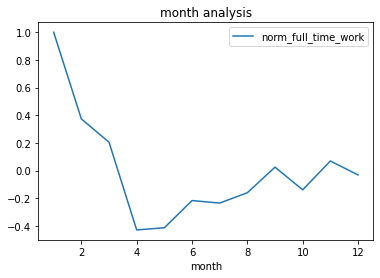

In [ ]:
#Plotting the normalised trend for full_time_work population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_full_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

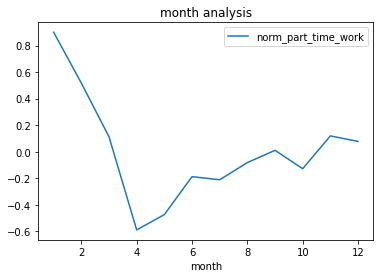

In [ ]:
#Plotting the normalised trend for part_time_work population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_part_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

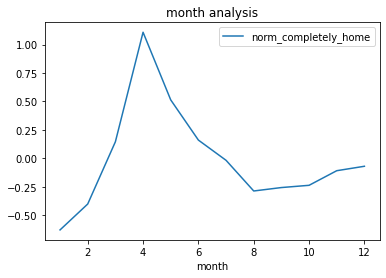

In [ ]:
#Plotting the normalised trend for completely home population for each month
grouped_dm.plot.line( title="month analysis", y = "norm_completely_home")